# General Polynomial Regression 1D
## ( with Basic Tikhonov Regularization)

Define the degree $k$ of the polynomial and regularization $\alpha$:

In [ ]:
k=5
alpha=1

We have the following data points:

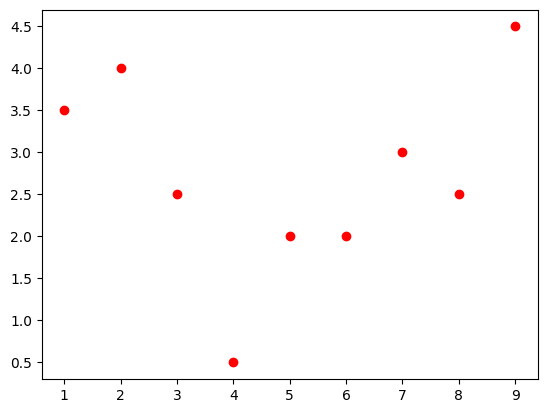

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dp = np.array([
    [1,3.5],
    [2,4],
    [3,2.5],
    [4,0.5],
    [5,2],
    [6,2],
    [7,3],
    [8,2.5],
    [9,4.5],
])

plt.plot(dp[:,0], dp[:,1], 'ro') # plot data points
plt.show()

Generate random small dataset from a 2D quadratic function

In [ ]:
def quadratic(x1, x2, w):
  return w[3] * x1**2 + w[4] * x1 * x2 + w[5] * x2**2 - w[1] * x1 + .02 * w[2] * x2 + w[0]

weights = np.array([7, -.03, .02, -.05, .01, .04])

lowerBound = -10
upperBound = 10

m = 100
x1 = np.random.uniform(lowerBound, upperBound, m)
print(x1)
x2 = np.random.uniform(lowerBound, upperBound, m)

[-8.74485698 -5.68407977 -6.87859676 -9.99004058 -8.32340097 -0.95251262
 -1.84066256 -3.78151956 -1.15131518 -4.74648776 -0.19837125  8.43654778
 -8.82205347 -6.97238784  6.25971384 -6.98044664  6.90821255  4.71290006
  2.18769421  1.38584046 -9.0035059   2.10998044  4.5310166  -3.32168999
 -0.14659497 -8.83717017 -7.27830359 -7.75021949  1.72117108 -5.94750379
 -2.8746012   3.45467062 -3.78160127 -7.56247709  5.26723694 -4.55517979
  3.08212221 -2.129747   -2.11074402  2.1970744   0.12548748 -3.51104688
  1.06101395 -3.77384077 -5.47775936 -4.19744907 -2.57614393 -8.35640339
 -5.04143694 -0.16187587 -2.26267462 -5.07512784  7.14655656 -8.57803881
 -5.1754535  -5.17670904  3.86258526  6.22670714  5.96551225  7.59356855
  4.74781165 -0.94164049  3.67762036  6.92809019  1.98563303 -0.69416938
  3.51190787 -1.90350679  1.29535711 -5.97124876  4.10571827 -9.41773542
 -3.11253863  1.60511591  0.66128445  9.03651084 -6.32360878 -0.52107639
  6.38868876 -7.11802191 -0.09874593 -8.06358458 -5

Plot Dataset

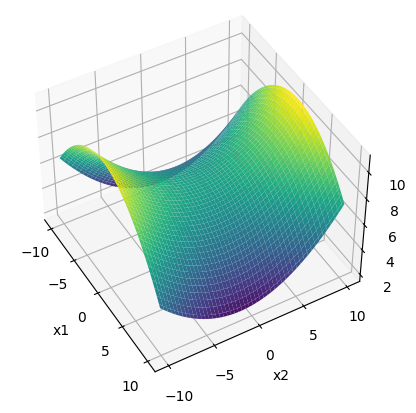

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x1s = np.linspace(lowerBound, upperBound, 100)
x2s = np.linspace(lowerBound, upperBound, 100)
x1s, x2s = np.meshgrid(x1s, x2s, indexing='xy')
z = quadratic(x1s, x2s, weights)

ax.plot_surface(x1s, x2s, z, cmap='viridis', edgecolor='none')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');
ax.view_init(45, -30)



We create our input matrix $X$ and output vector $\mathbf{y}$:

In [ ]:
m = x1.shape[0]
n = 1 + k
print(f'problem dimensions: {m}x{n}')

X_input = np.column_stack((x1, x2))

X = np.ones(shape=(m,n))


for i in range(0, m):
  X[i, 1] = x1[i]
  X[i, 2] = x2[i]
  X[i, 3] = x1[i] ** 2
  X[i, 4] = x1[i] * x2[i]
  X[i, 5] = x2[i] ** 2

dist_mean = 0
dist_std_dev = 1
gaussian_noise = np.random.normal(dist_mean, dist_std_dev, m)

y = quadratic(x1, x2, weights) + gaussian_noise
print(X.shape)
print(weights.shape)
y_predicted = X @ weights

print('X: ', X)
print('y: ', y)

problem dimensions: 100x6
(100, 6)
(6,)
X:  [[ 1.00000000e+00 -8.74485698e+00  1.41365177e+00  7.64725237e+01
  -1.23621826e+01  1.99841133e+00]
 [ 1.00000000e+00 -5.68407977e+00  6.46924588e+00  3.23087628e+01
  -3.67717096e+01  4.18511423e+01]
 [ 1.00000000e+00 -6.87859676e+00 -8.66266411e+00  4.73150933e+01
   5.95869732e+01  7.50417495e+01]
 [ 1.00000000e+00 -9.99004058e+00  2.50660503e+00  9.98009108e+01
  -2.50410860e+01  6.28306877e+00]
 [ 1.00000000e+00 -8.32340097e+00  7.77597637e+00  6.92790037e+01
  -6.47225692e+01  6.04658085e+01]
 [ 1.00000000e+00 -9.52512615e-01 -4.96136052e+00  9.07280283e-01
   4.72575849e+00  2.46150982e+01]
 [ 1.00000000e+00 -1.84066256e+00 -2.74712522e+00  3.38803868e+00
   5.05653055e+00  7.54669697e+00]
 [ 1.00000000e+00 -3.78151956e+00 -7.74659145e+00  1.42998901e+01
   2.92938871e+01  6.00096792e+01]
 [ 1.00000000e+00 -1.15131518e+00  9.30562674e+00  1.32552665e+00
  -1.07137094e+01  8.65946891e+01]
 [ 1.00000000e+00 -4.74648776e+00  1.88127912e-

Create the regression normal matrix $A=X^T X$, regularized matrix $M=(X^T X-\alpha I)$, and inverse $M^{-1}$:

In [ ]:
A = np.matmul(X.T,X)
I = np.identity(A.shape[0])
M = A + alpha*I
M_inv = np.linalg.inv(M)

print(M)
print(M_inv)

print(f'size of regularized normal matrix: {n}x{n}')

[[ 1.01000000e+02 -1.18347955e+02 -6.58550373e-01  2.95438279e+03
  -1.31477281e+02  3.12087325e+03]
 [-1.18347955e+02  2.95538279e+03 -1.31477281e+02 -7.54824749e+03
  -4.87361686e+02 -4.17317085e+03]
 [-6.58550373e-01 -1.31477281e+02  3.12187325e+03 -4.87361686e+02
  -4.17317085e+03  6.19962361e+02]
 [ 2.95438279e+03 -7.54824749e+03 -4.87361686e+02  1.66863850e+05
  -8.47331701e+03  6.80849249e+04]
 [-1.31477281e+02 -4.87361686e+02 -4.17317085e+03 -8.47331701e+03
   6.80859249e+04 -1.57233159e+04]
 [ 3.12087325e+03 -4.17317085e+03  6.19962361e+02  6.80849249e+04
  -1.57233159e+04  1.85474254e+05]]
[[ 4.06605356e-02 -4.98228742e-04 -1.55621188e-04 -5.42570670e-04
  -1.18910289e-04 -5.05773017e-04]
 [-4.98228742e-04  3.94053246e-04  2.99972182e-05  2.33806530e-05
   8.75664048e-06  9.30898232e-06]
 [-1.55621188e-04  2.99972182e-05  3.52285465e-04  5.46286912e-06
   2.26556700e-05  2.03120922e-06]
 [-5.42570670e-04  2.33806530e-05  5.46286912e-06  1.50293131e-05
   2.32183557e-06  4.317

Calculate optimal weight vector $\mathbf{w} = (X^T X-\alpha I)^{-1} X^T \mathbf{y}$:

In [ ]:
w = np.matmul(np.matmul(M_inv, X.T),y)
print(w)
print(f'f(x) = 1  *{w[0]}')
for i in range(1,n):
    print(f'       x^{i}*{w[i]}')

[ 6.574923    0.02313388 -0.01225763 -0.04578949  0.00749454  0.04723053]
f(x) = 1  *6.574923000295772
       x^1*0.023133878731544294
       x^2*-0.012257626184291187
       x^3*-0.04578949199941604
       x^4*0.007494538332345398
       x^5*0.04723052740445993


Define vectorized polynomial evaluation function:

In [ ]:
def univariate_polynom(w, xs):
    powers = np.ones_like(xs)
    ys = np.zeros_like(xs)
    for i in range(0,n):
        ys = ys + w[i]*powers
        powers = powers*xs
    return ys

Plot data points and polynomial of degree $k$:

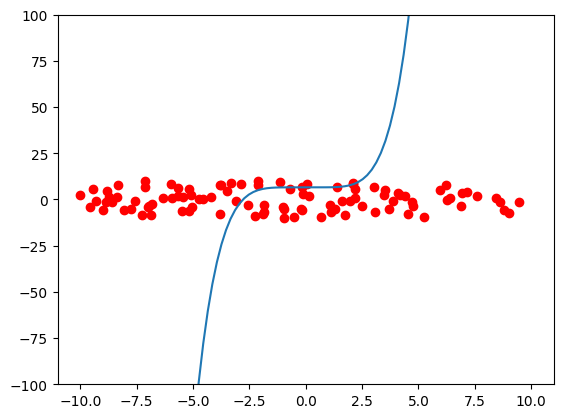

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.plot(x1, x2, 'ro') # plot data points

x_vals = np.linspace(-10,10,100)
y_vals = univariate_polynom(w, x_vals)

plt.plot(x_vals, y_vals) # plot linear function
plt.ylim(-100, 100)
plt.show()

Print statistics such as: domain intervals, gausian noise variance, real weights, estimated weights, and MSE for the dataset

In [ ]:
def mean_squared_error(predicted_outcome, actual_outcome, m):
  sum = 0
  for i in range(0, m):
    sum += (predicted_outcome[i] - actual_outcome[i]) ** 2
  return sum / m

mse = mean_squared_error(y_predicted, y, m)
np.set_printoptions(precision=4) # Format decimals to look better
print(f"Domain Interval: [{lowerBound}, {upperBound}]")
print(f"Guassian noise variance: {gaussian_noise}")
print(f"Real weights: {weights}")
print(f"Estimated weights: {w}")
print(f"Mean squared error: {mse:.4f}")


Domain Interval: [-10, 10]
Guassian noise variance: [ 0.4783  0.6048 -0.6553  1.2014 -0.1488 -0.4833  0.9514 -0.0637 -0.552
  0.3389  0.9467 -0.2779 -0.8157 -0.3297  1.071   0.0799  1.5236  0.6342
  0.6307 -0.3007  0.0699  0.2843  1.0124 -0.7757 -1.1824  0.0799  0.7004
  0.4895 -0.2895 -1.0281 -0.0497 -1.1807  0.9345 -0.191  -0.0356  1.3552
  1.3748 -1.5652  0.217   0.0295  0.0844 -0.0307  0.6646  0.5686  0.0537
  1.0176 -0.3952 -0.8454 -2.5685  1.0128 -0.775  -0.9547 -0.3775  0.9833
 -0.4248  0.7929 -0.1243  0.4679 -0.7455  0.4341 -0.2475  2.2498 -1.1586
  0.7174 -0.5517 -0.5375 -0.6645  0.9742  1.403   1.2549 -0.8471  0.0615
  1.3535  0.7577 -0.7278 -0.466   1.095   0.1476 -1.11    1.9776 -3.0696
 -1.4666 -0.153  -0.2869 -0.527  -1.4383 -0.1488 -1.315  -0.3697  1.885
  1.7362 -2.7788 -0.5612  1.5489 -1.479  -0.358   0.0394 -0.9394 -0.585
  0.8861]
Real weights: [ 7.   -0.03  0.02 -0.05  0.01  0.04]
Estimated weights: [ 6.5749  0.0231 -0.0123 -0.0458  0.0075  0.0472]
Mean squared erro